In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
chest = cv2.imread('chest.tif', cv2.IMREAD_ANYDEPTH)
spine = cv2.imread('spineXray.tif', cv2.IMREAD_ANYDEPTH)

In [4]:
print(chest.dtype)
print(chest.shape)

uint16
(493, 600)


In [5]:
print(spine.dtype)
print(spine.shape)

uint8
(706, 320)


In [7]:
def performCLAHE(im):
    clahe = cv2.createCLAHE()
    return clahe.apply(im)

CLAHE limits the amplification by clipping the histogram at a predefined value called clip limit.

tileGridSize refers to Size of grid for histogram equalization. Input image will be divided into equally sized rectangular tiles. tileGridSize defines the number of tiles in row and column.

In [42]:
def transform(im):
    dtype = im.dtype
    if(dtype != 'uint8'):
        im = (im)/(65535)*(255)
    return cv2.equalizeHist(im.astype('uint8'))

In [46]:
chest_transform = transform(chest)
chest_clahe = performCLAHE(chest)
spine_transform = transform(spine)
spine_clahe = performCLAHE(spine)

In [80]:
chest_transform.shape

(493, 600)

In [81]:
spine.shape

(706, 320)

In [85]:
chest_transform_hist = cv2.calcHist(chest_transform, [0], None, [64], (0,255), accumulate=False)
chest_clahe_hist = cv2.calcHist(chest_clahe, [0], None, [64], (0,255), accumulate=False)
spine_transform_hist = cv2.calcHist(spine_transform, [0], None, [64], (0,255), accumulate=False)
spine_clahe_hist = cv2.calcHist(spine_clahe, [0], None, [64], (0,255), accumulate=False)
spine_hist = cv2.calcHist(spine, [0], None, [64], (0,255), accumulate=False)
chest_hist = cv2.calcHist(chest, [0], None, [64], (0,255), accumulate=False)

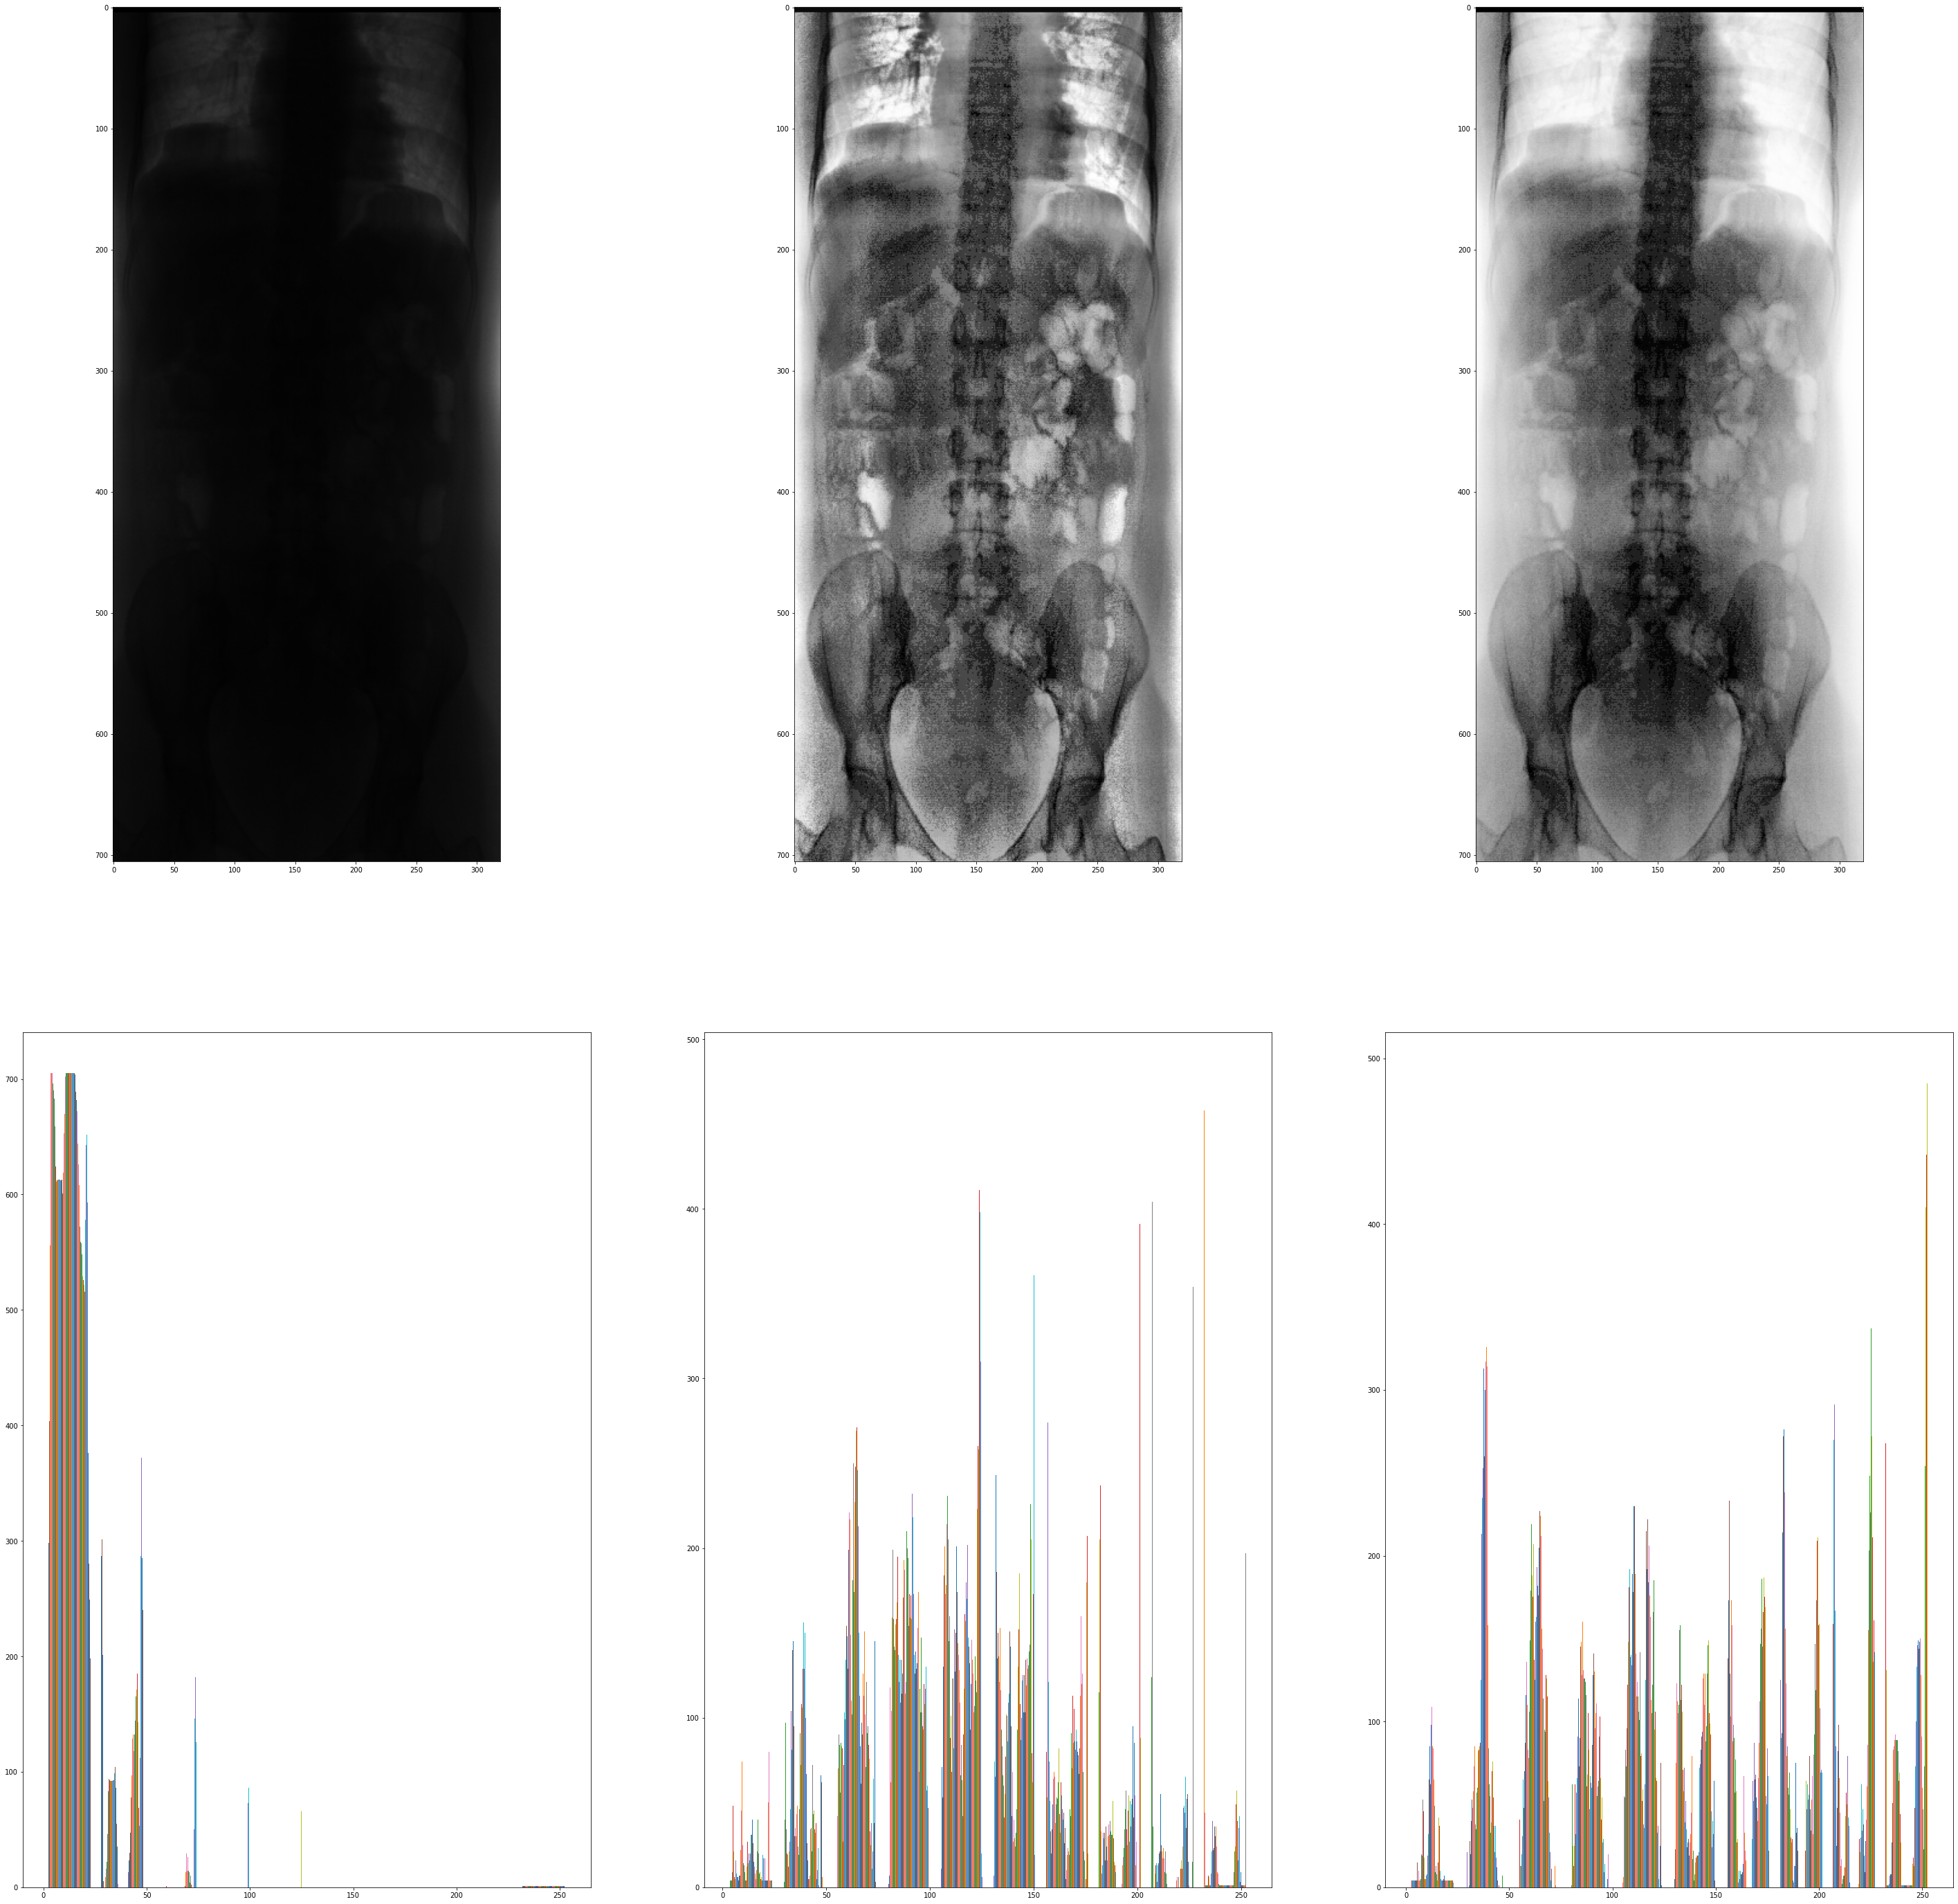

In [87]:
plt.figure(figsize=(50, 50))
plt.subplot(231), plt.imshow(spine, cmap='gray')
plt.subplot(232), plt.imshow(spine_clahe, cmap='gray')
plt.subplot(233), plt.imshow(spine_transform, cmap='gray')
plt.subplot(234), plt.hist(spine)
plt.subplot(235), plt.hist(spine_clahe)
plt.subplot(236), plt.hist(spine_transform)
plt.show()

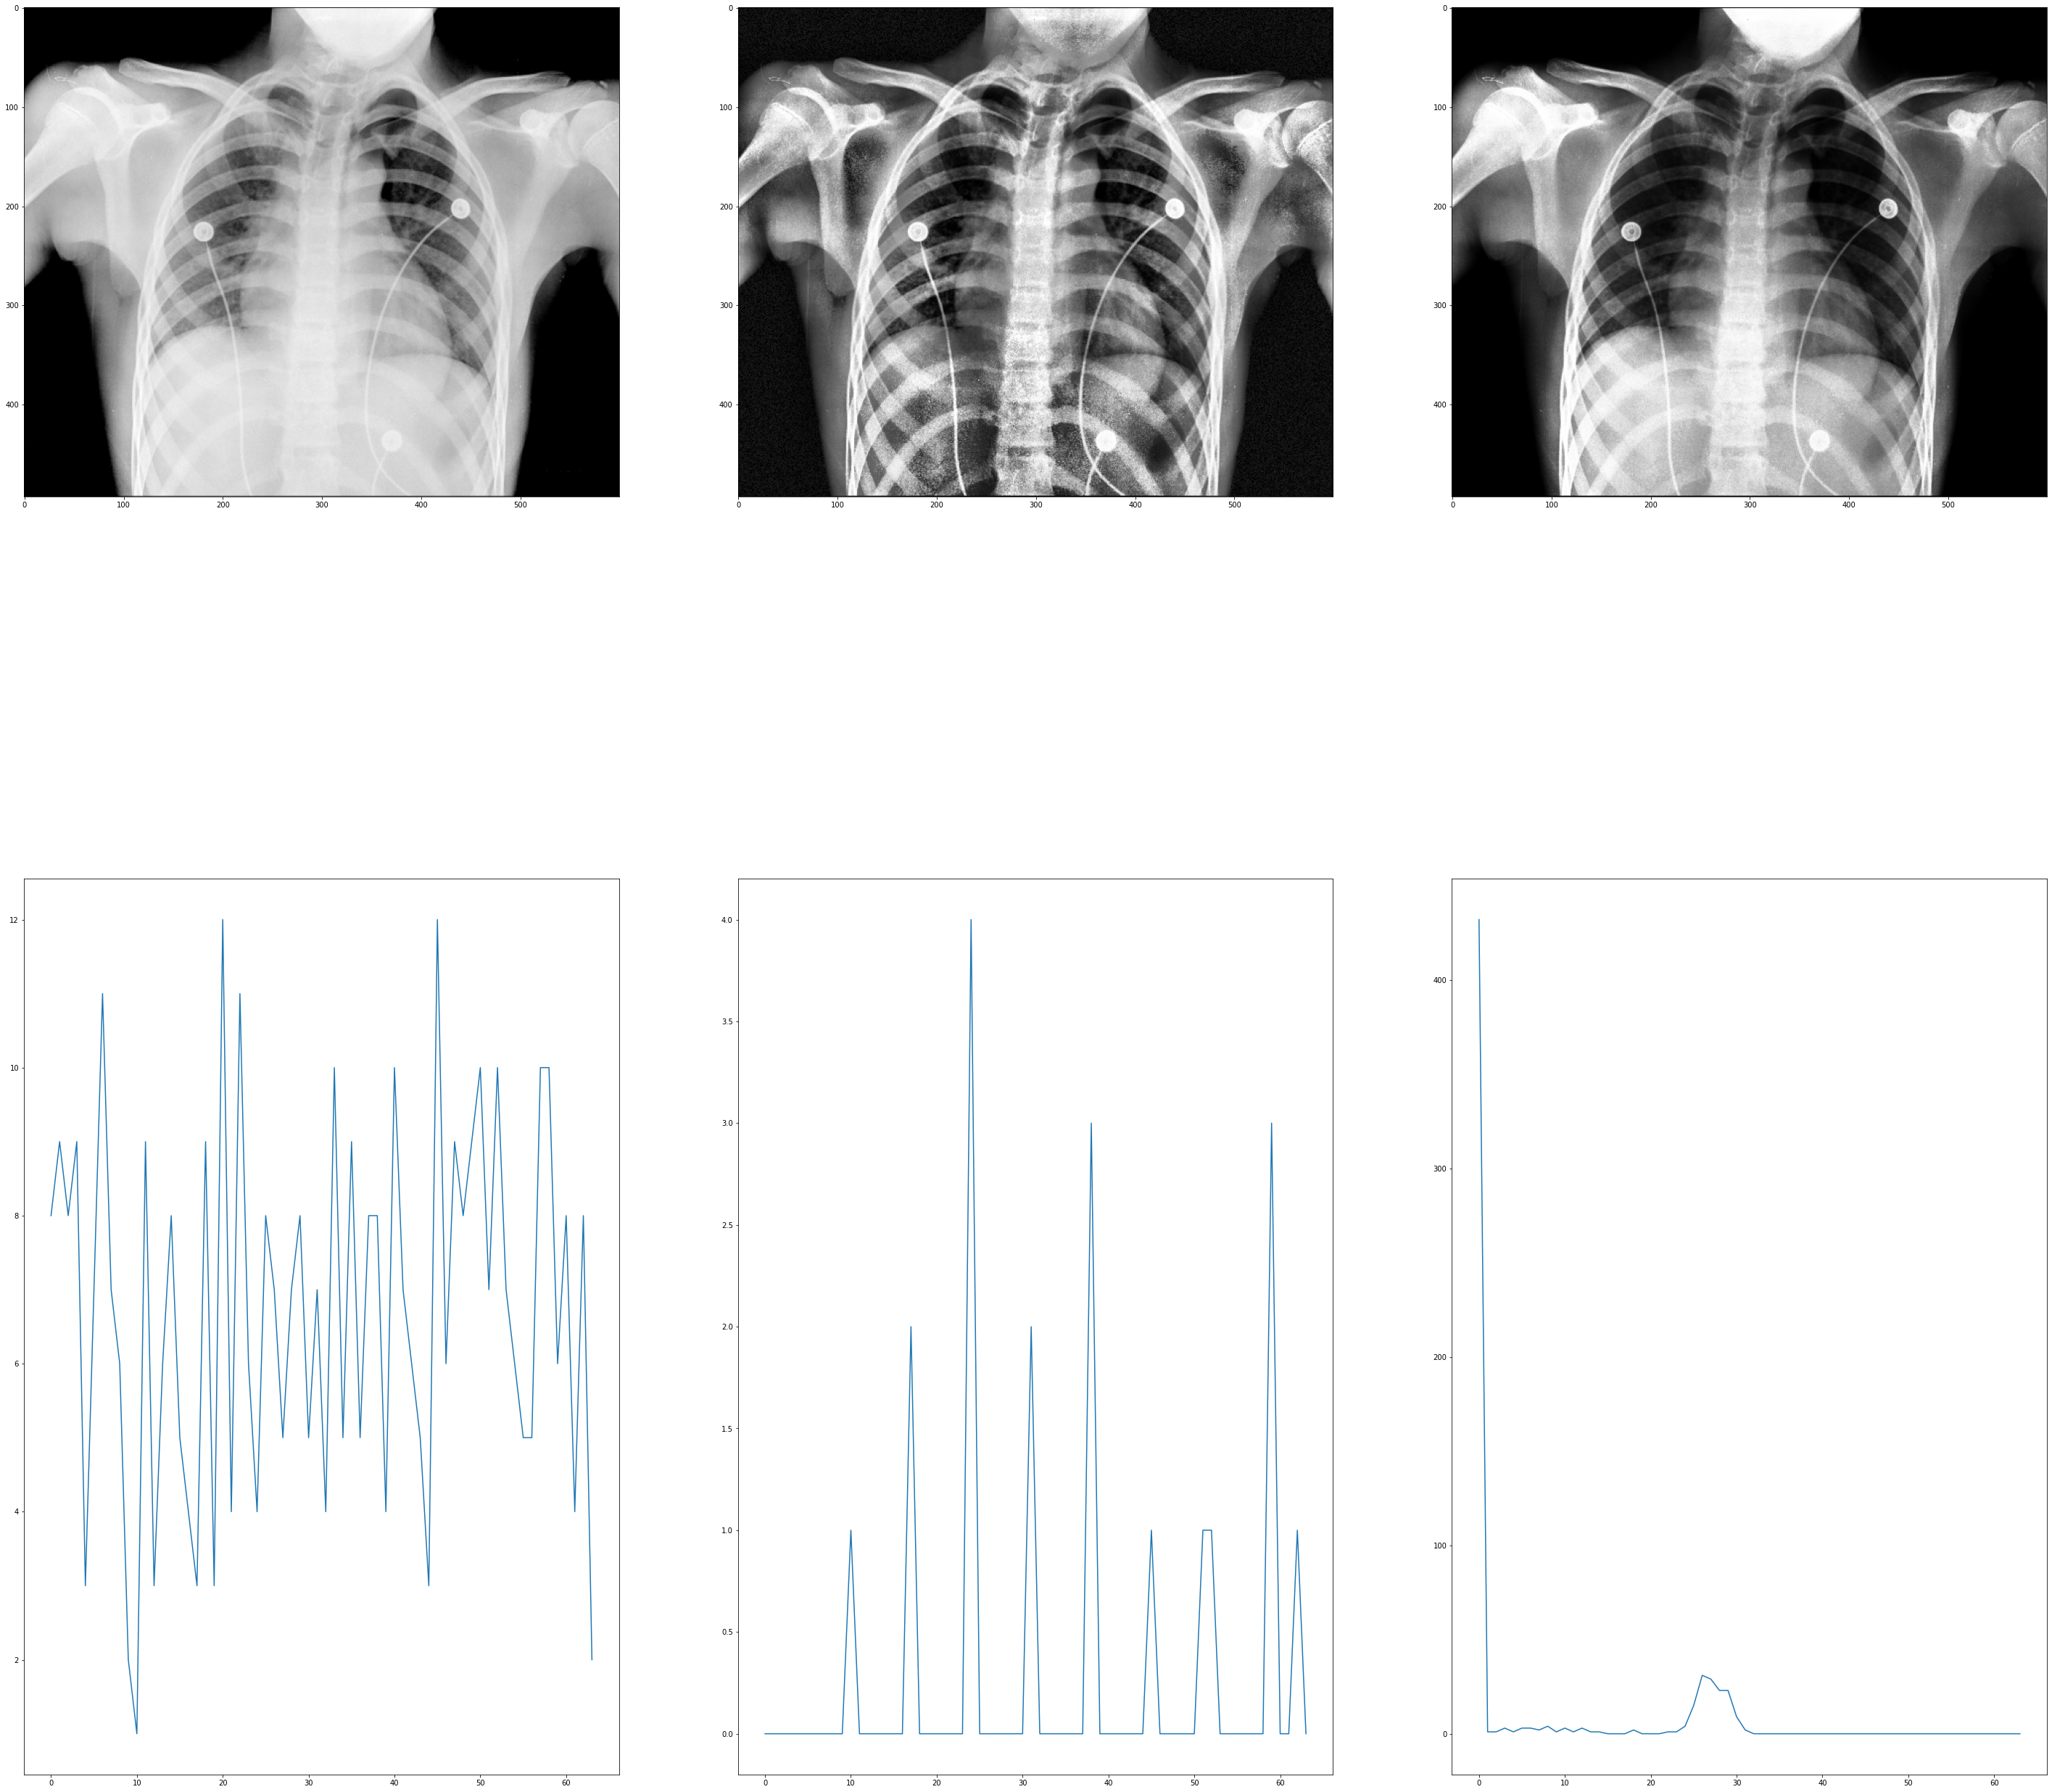

In [88]:
plt.figure(figsize=(50, 50))
plt.subplot(231), plt.imshow(chest, cmap='gray')
plt.subplot(232), plt.imshow(chest_clahe, cmap='gray')
plt.subplot(233), plt.imshow(chest_transform, cmap='gray')
plt.subplot(234), plt.plot(chest_hist)
plt.subplot(235), plt.plot(chest_clahe_hist)
plt.subplot(236), plt.plot(chest_transform_hist)
plt.show()

روش مناسبی برای بهبود تصاویر میباشد.